<a href="https://colab.research.google.com/github/sanchitkalra/bits-f312-nnfl/blob/main/Assignment_1_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [95]:
pip install openpyxl==3.0.9

In [96]:
data = pd.read_excel('/content/drive/MyDrive/data.xlsx',header=None)
print(data)

              0           1           2   ...        58        59  60
0     242.751526  281.801298  250.032405  ...  1.281972  1.844860   1
1     216.585951  297.057883  300.938478  ...  1.598582  1.625395   1
2     265.735536  339.271134  269.817305  ...  1.848160  1.706134   1
3     207.631953  255.284282  254.563071  ...  1.710404  1.664391   1
4     205.016124  333.265999  536.342842  ...  1.703264  1.535684   1
...          ...         ...         ...  ...       ...       ...  ..
3407  723.913528  343.529660  360.468834  ...  1.948758  1.758541   4
3408  466.593370  215.858228  235.940729  ...  1.568558  1.494537   4
3409  446.227198  219.936910  181.605753  ...  1.418510  1.772295   4
3410  511.406437  215.379710  170.598957  ...  1.609298  1.664890   4
3411  757.967516  268.431243  189.755280  ...  1.790039  1.560633   4

[3412 rows x 61 columns]


In [97]:
datan = data.values
X = datan[:, 0:60]
m = X.shape[0]
print(m)
xmin = np.min(X, axis = 0)
xmax = np.max(X, axis = 0)
X = (X-xmin)/(xmax - xmin)
# pp = np.ones([datan.shape[0], 1]) # vector containg ones as all elements
# X = np.append(pp,X, axis=1) #Column of ones
#print(X)
print(X.shape)
y=datan[:, 60] # class label
y = y - 1
#print(y)
print(y.shape)

3412
(3412, 60)
(3412,)


In [98]:
def sigmoid(z):
  return 1.0/(1 + np.exp(-z)) ###activation function

In [99]:
def cost_function(X,y,w): ###define cost function
  hypothesis = sigmoid(np.dot(X,w.T)) ###calculation of hypothesis for all instances
  J =-(1/m)*(np.sum(y*(np.log(hypothesis)) + (1-y)*np.log(1-hypothesis))) ####as mention in
  return J

In [128]:
def batch_gradient_descent(X,y,w,alpha,iters, lamb):
  cost_history = np.zeros(iters) # cost function for each iteration
  #initalize our cost history list to store the cost function on every iteration
  for i in range(iters):
    hypothesis = sigmoid(np.dot(X,w.T))
    w = w - (alpha/len(y)) * np.dot(hypothesis - y, X) + (lamb/2)*np.sum(w**2)
    cost_history[i] = cost_function(X,y,w)
  return w,cost_history

In [101]:
def MB_gradient_descent(X,y,w,alpha, iters, batch_size):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y)-batch_size)
    ind_x = X[rand_index:rand_index+batch_size]
    ind_y = y[rand_index:rand_index+batch_size]
    w = w - (alpha/batch_size) * (ind_x.T.dot(sigmoid(ind_x.dot(w)) - ind_y))
    cost_history[i] = cost_function(ind_x,ind_y,w)
  return w, cost_history

In [102]:
def stochastic_gradient_descent(X,y,w,alpha, iters):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y)-1)
    ind_x = X[rand_index:rand_index+1]
    ind_y = y[rand_index:rand_index+1]
    w = w - alpha * (ind_x.T.dot(sigmoid(ind_x.dot(w)) - ind_y))
    cost_history[i] = cost_function(ind_x,ind_y,w)
  return w, cost_history

In [103]:
from sklearn.model_selection import train_test_split

x_train, x_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.3)
print(x_train.shape)
print(x_test1.shape)

(2388, 60)
(1024, 60)


In [104]:
x_test, x_val, y_test, y_val = train_test_split(x_test1, y_test1, test_size=0.33)
print(x_test.shape)
print(x_val.shape)

(686, 60)
(338, 60)


In [105]:
print(y_train.shape)

(2388,)


In [106]:
#def x(x): return lambda: True if(x == 0) else False

In [107]:
#print([x for x in y_train.transpose()])

In [108]:
fuck = lambda x: 1 if(x == 0) else 0

In [109]:
squares = np.array([fuck(x) for x in y_train])

In [110]:
print(squares)

[1 1 1 ... 0 0 0]


In [111]:
weights = []
for k in range(4):
  weights.append(np.random.randn(1,X.shape[1]).ravel())
  #print(weights)

#print(weights)

In [124]:
cases = []
cases_t = []

for k in range(4):
  f = lambda x: 1 if(x == k) else 0
  y_tr = np.array([f(x) for x in y_train])
  y_te = np.array([f(x) for x in y_test])
  print(y_tr)
  cases.append(y_tr)
  cases_t.append(y_te)

[1 1 1 ... 0 0 0]
[0 0 0 ... 1 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 1 1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  


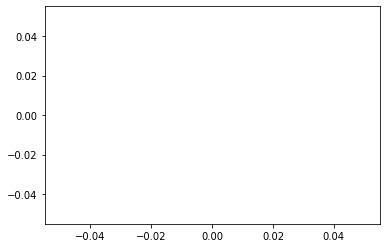

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  


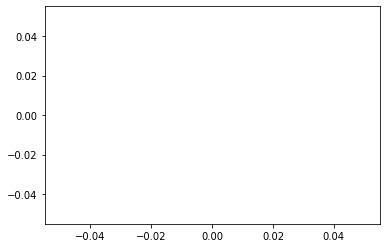

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  


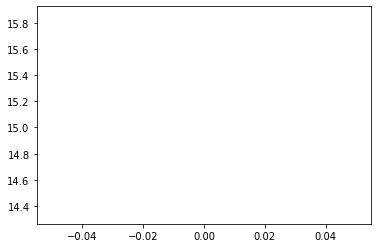

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  


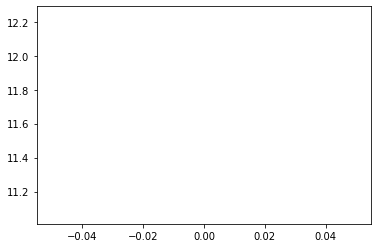

0.7594752186588921
0.7405247813411079
0.7580174927113703
0.7419825072886297


In [129]:
from sklearn.metrics import confusion_matrix

for k in range(len(cases)):
  alpha=0.02 ##learning rate
  iters=20000 ###iterations
  lamb = 0.1
  batch_w,J_his = batch_gradient_descent(x_train,cases[k],weights[k],alpha,iters, lamb)
  weights[k] = batch_w
  plt.plot(range(iters),J_his)
  plt.show()

y_p = []

for k in range(len(weights)):
  z = np.dot(x_test, weights[k].T)
  h = sigmoid(z)
  y_pred=h>0.5
  y_pred=y_pred.astype(int)
  #print(y_pred)
  y_p.append(y_pred)
  #print(weights[k])
  cm=confusion_matrix(cases_t[k], y_pred)
  accuracy=(cm[0][0]+cm[1][1])/(len(y_test))
  print(accuracy)

In [114]:
from sklearn.model_selection import KFold
kf10 = KFold(n_splits=10, shuffle=False)

In [115]:
sets = []

for train_index, test_index in kf10.split(X):
    print(np.take(X,train_index).shape, np.take(y, train_index).shape, np.take(X,test_index).shape, np.take(y, test_index).shape)
    sets.append([np.take(X,train_index), np.take(y, train_index), np.take(X,test_index), np.take(y, test_index)])

(3070,) (3070,) (342,) (342,)
(3070,) (3070,) (342,) (342,)
(3071,) (3071,) (341,) (341,)
(3071,) (3071,) (341,) (341,)
(3071,) (3071,) (341,) (341,)
(3071,) (3071,) (341,) (341,)
(3071,) (3071,) (341,) (341,)
(3071,) (3071,) (341,) (341,)
(3071,) (3071,) (341,) (341,)
(3071,) (3071,) (341,) (341,)


In [116]:
J_his = []

for k in range(10):
  alpha=0.02 ##learning rate
  iters=2000 ###iterations
  weights[k],his = batch_gradient_descent(sets[k][0], sets[k][1], weights[k], alpha, iters)
  J_his.append(his)

ValueError: ignored